<a href="https://colab.research.google.com/github/Untick/insects_detection/blob/main/Romashenkov%20Leonid/LR_YOLOv8_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключаем диск

In [ ]:
!nvidia-smi

Thu Sep  7 14:32:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive # подключаем гугл драйв диск для загрузки файлов
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.172 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
from IPython import display
display.clear_output()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image
model = YOLO("yolov8n.pt")

In [ ]:
# Train
results = model.train(data='/content/drive/MyDrive/УИИ/Base/214/conf.yaml', imgsz=800, batch=8, epochs=50, plots=True)

Ultralytics YOLOv8.0.172 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/УИИ/Base/214/conf.yaml, epochs=50, patience=50, batch=8, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, 

In [ ]:
model.val(data='/content/drive/MyDrive/УИИ/Base/214/conf.yaml', conf=0.5)

Ultralytics YOLOv8.0.172 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/УИИ/Base/214/labels/val.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]
                   all         20        306      0.941      0.572      0.761      0.488
Speed: 11.1ms preprocess, 54.7ms inference, 0.0ms loss, 32.6ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab9143e8ca0>
fitness: 0.5149020624506241
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.48758])
names: {0: 'hole'}
plot: True
results_dict: {'metrics/precision(B)': 0.9408602150537635, 'metrics/recall(B)': 0.5718954248366013, 'metrics/mAP50(B)': 0.7607733128979839, 'metrics/mAP50-95(B)': 0.4875830346231397, 'fitness': 0.5149020624506241}
save_dir: PosixPath('runs/detect/val2')
speed: {'preprocess': 11.092817783355713, 'inference': 54.749512672424316, 'loss': 0.0033736228942871094, 'postprocess': 32.56685733795166}

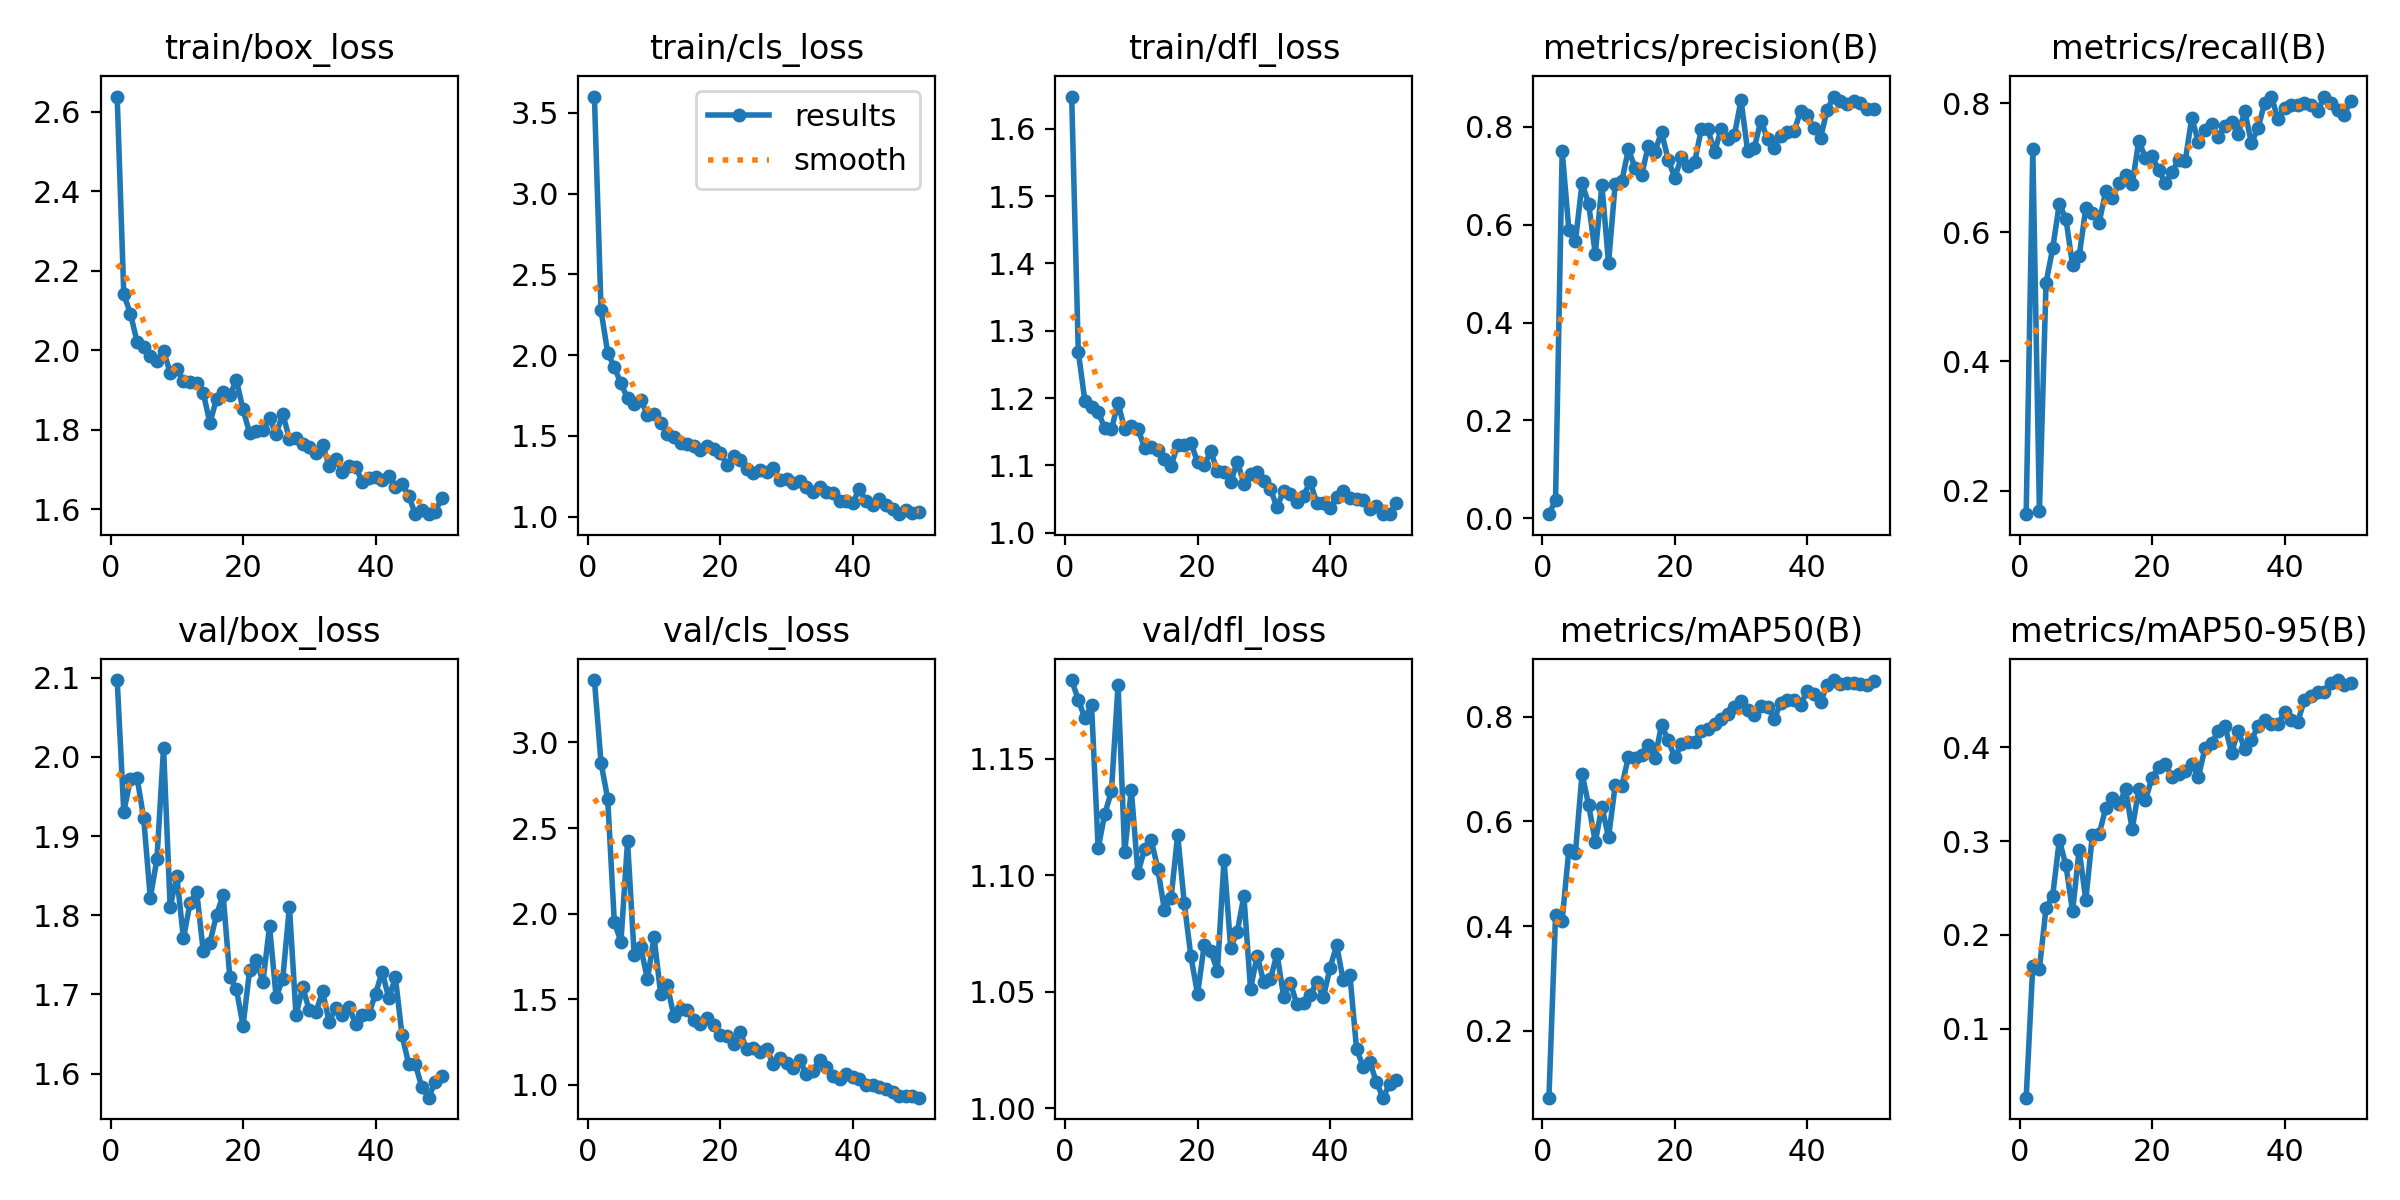

In [ ]:
Image(filename='/content/runs/detect/train/results.png', height=600, width=1200)

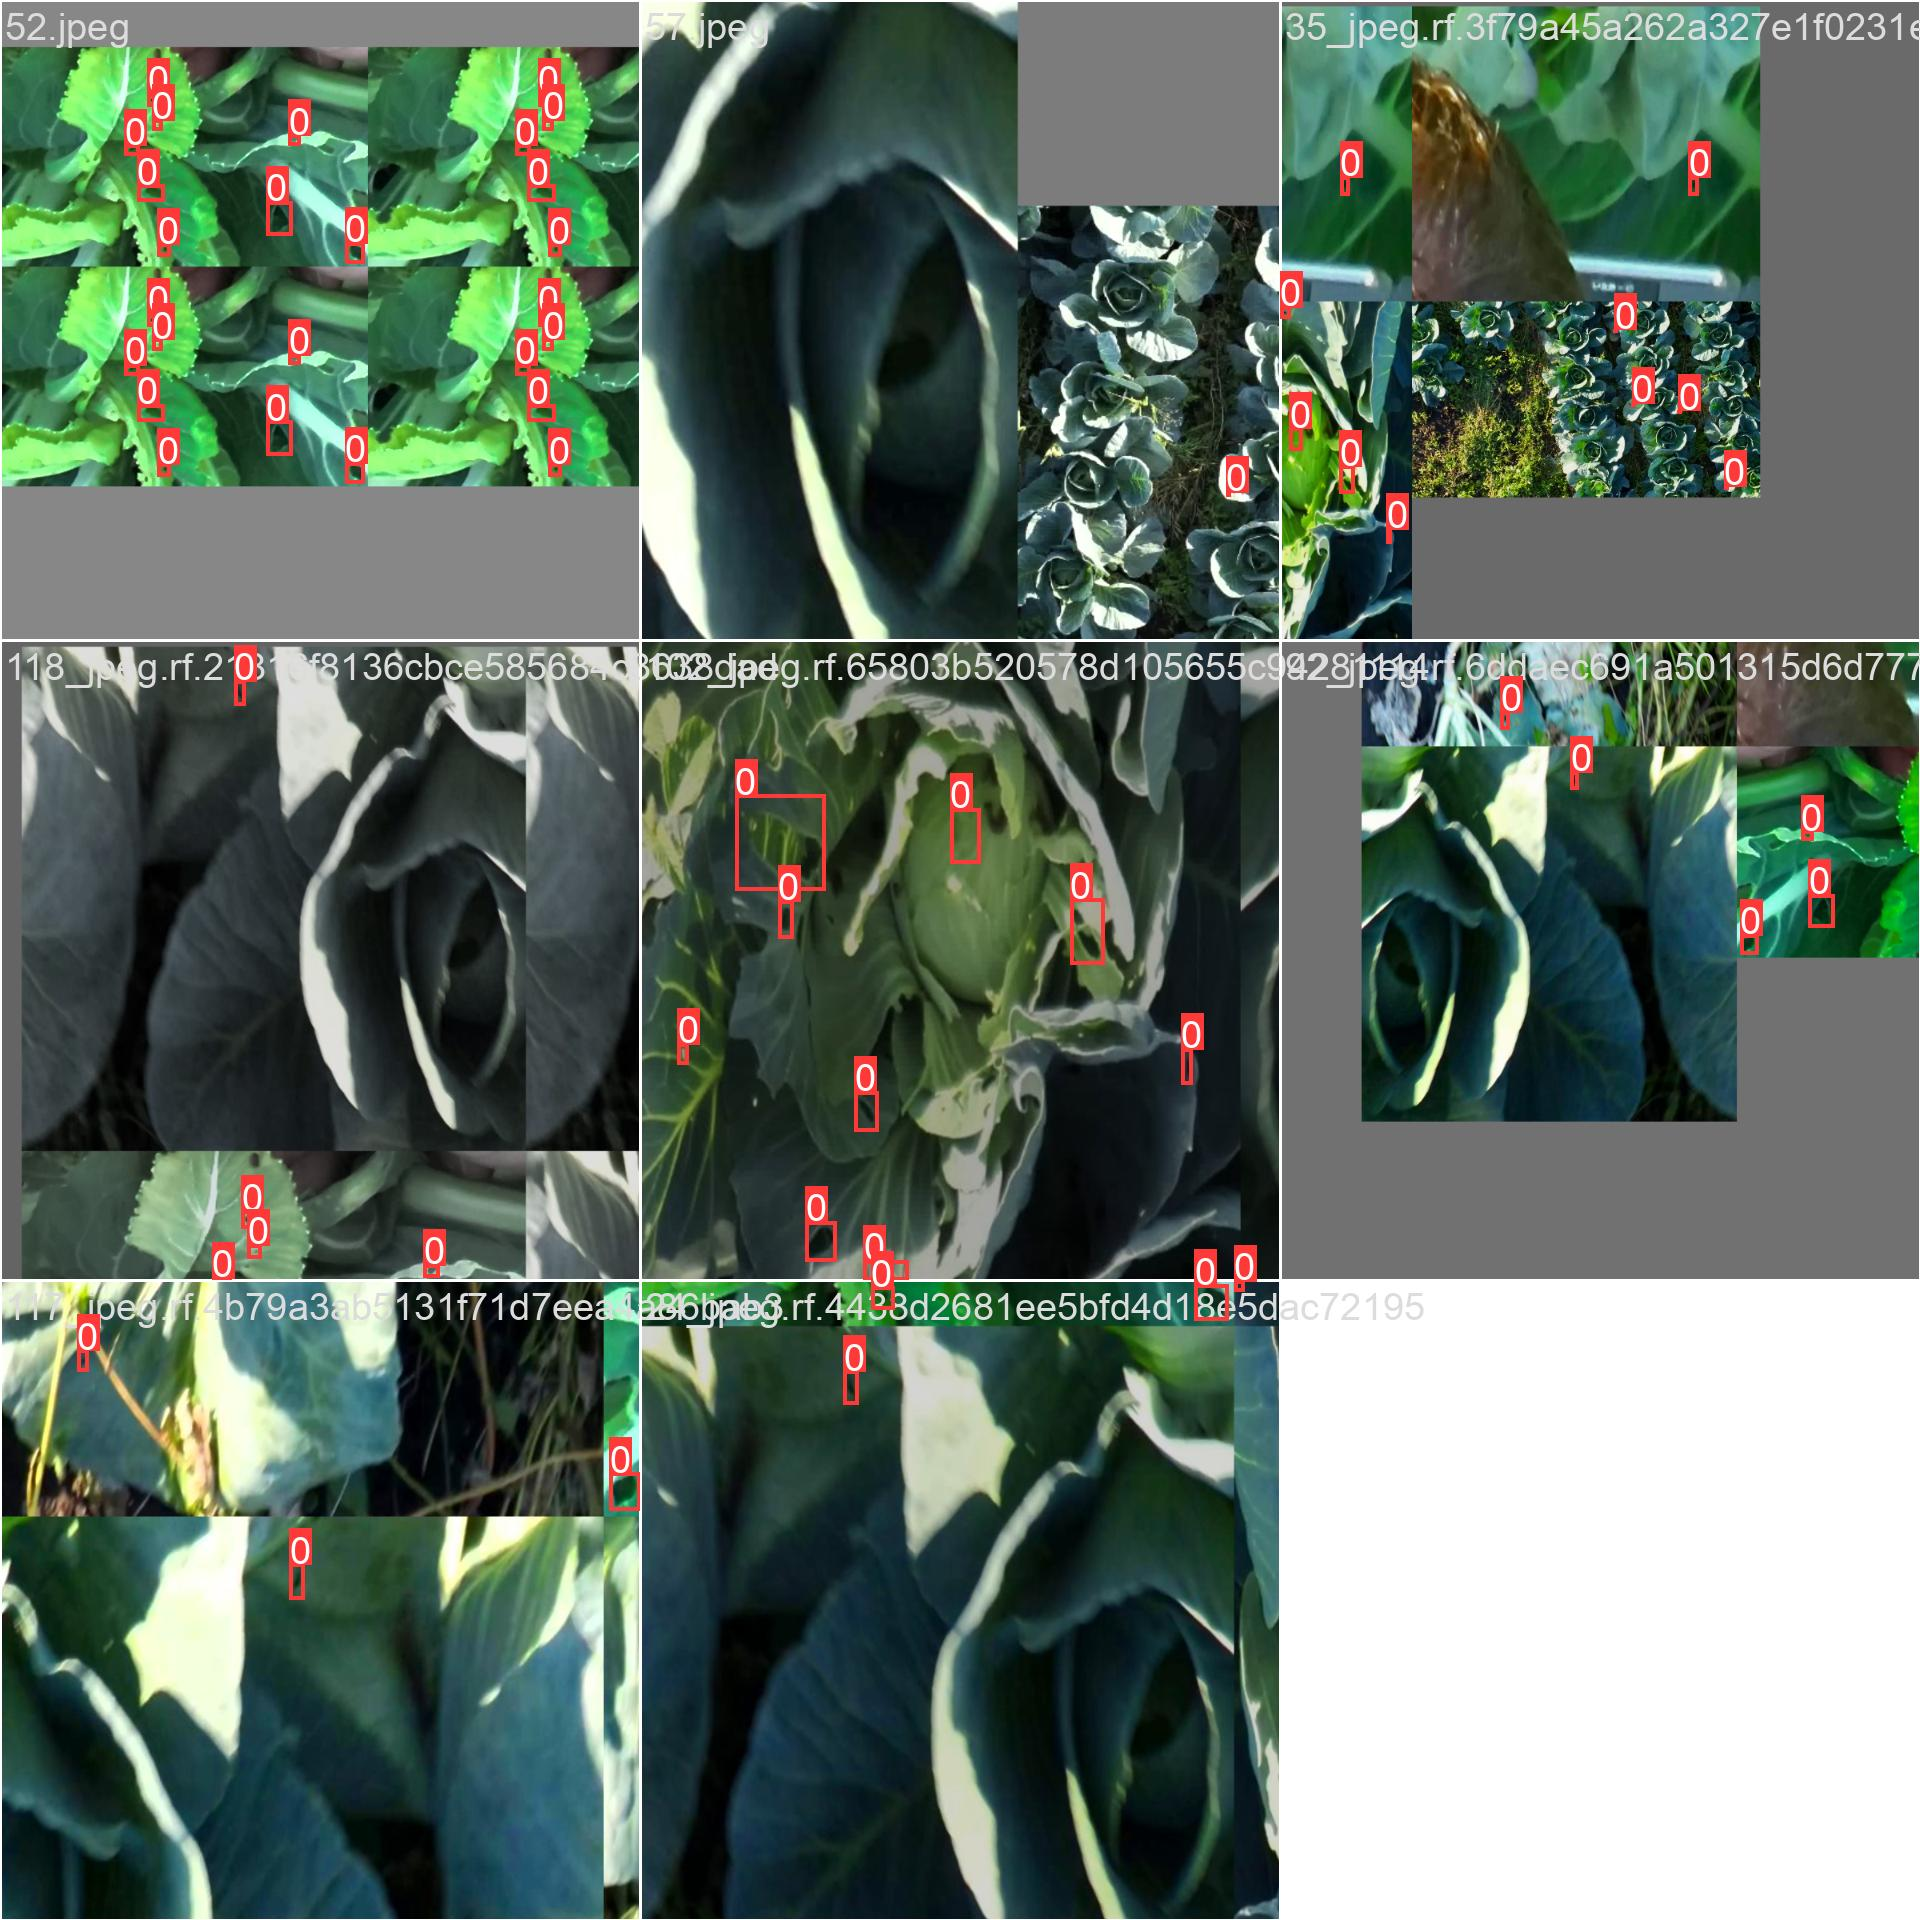

In [ ]:
Image(filename='/content/runs/detect/train/train_batch0.jpg', height=600, width=1200)

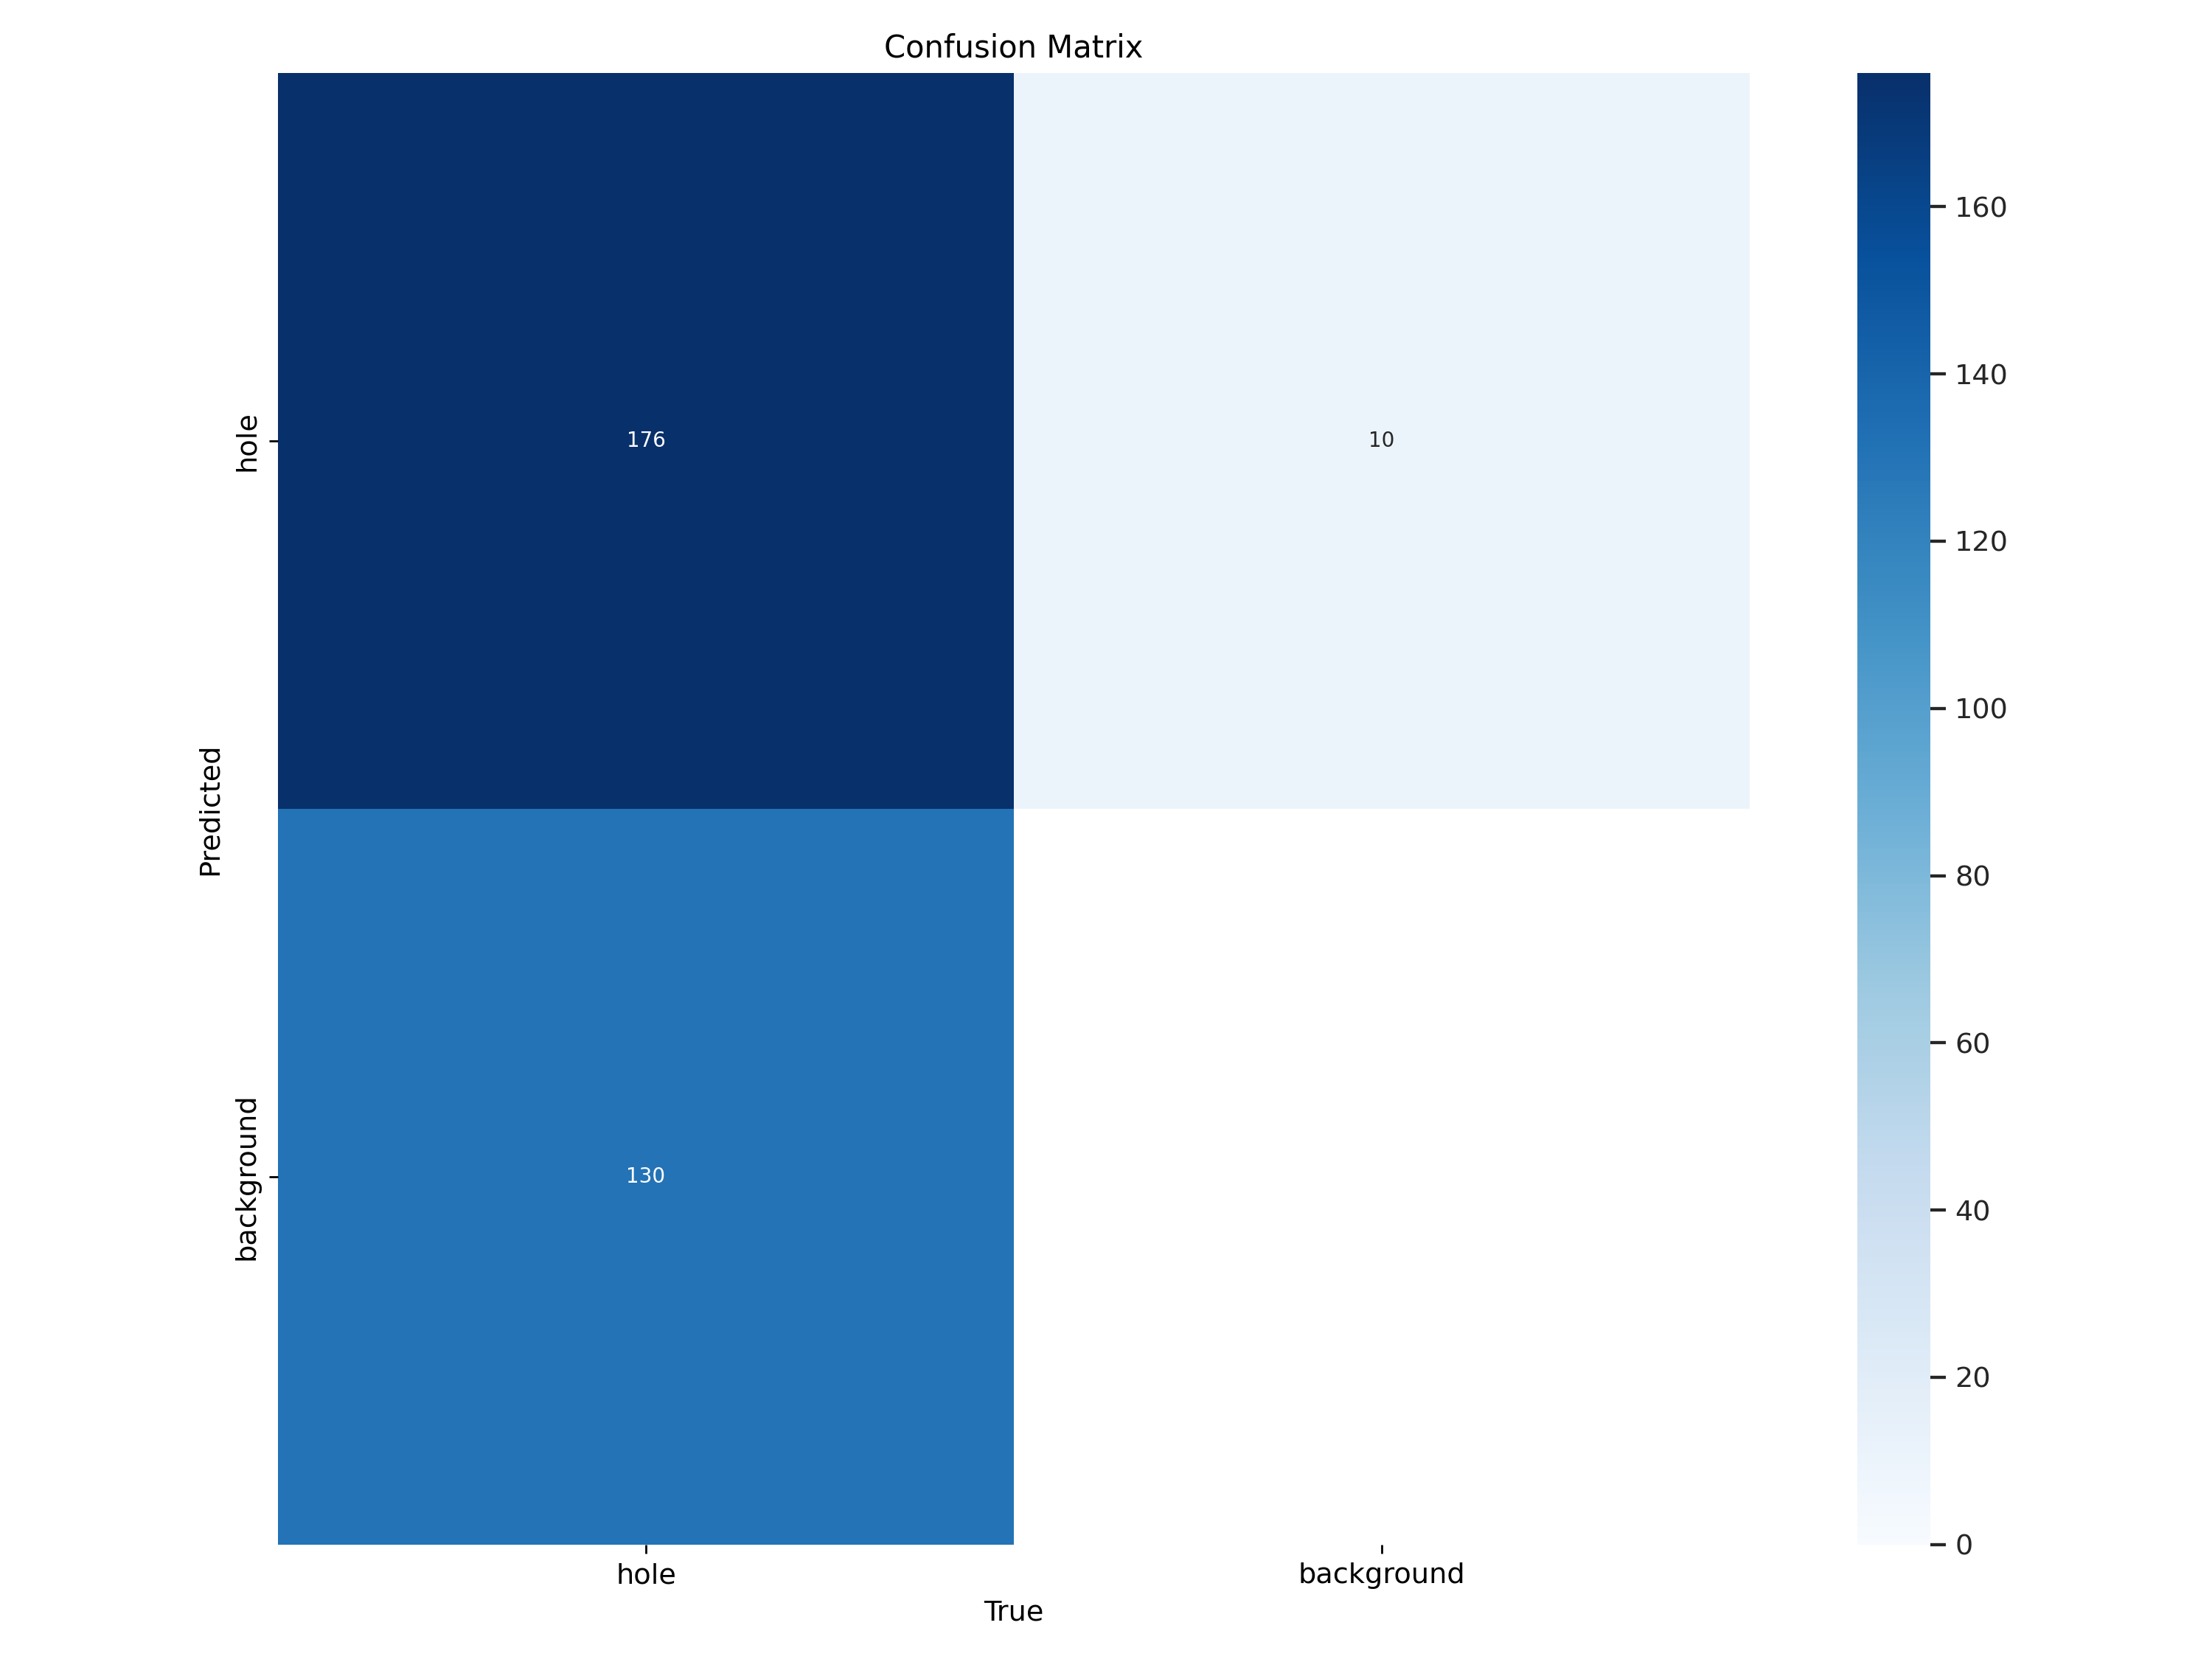

In [ ]:
Image(filename='/content/runs/detect/val/confusion_matrix.png', height=600, width=1200)

/content/runs/detect/val/val_batch2_labels.jpg


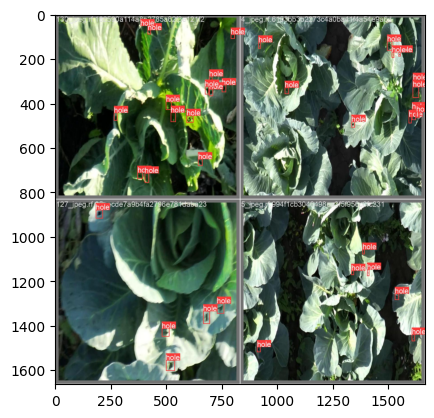

/content/runs/detect/val/val_batch1_labels.jpg


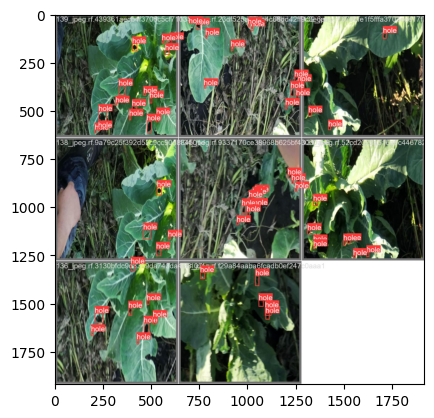

/content/runs/detect/val/val_batch2_pred.jpg


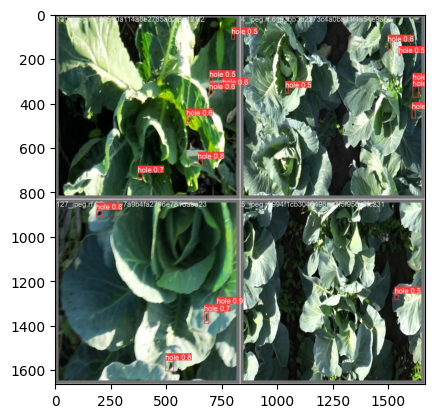

/content/runs/detect/val/val_batch0_labels.jpg


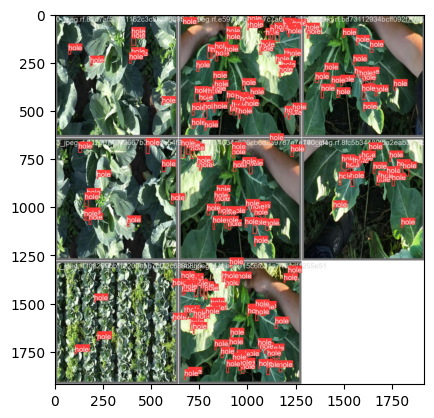

/content/runs/detect/val/val_batch0_pred.jpg


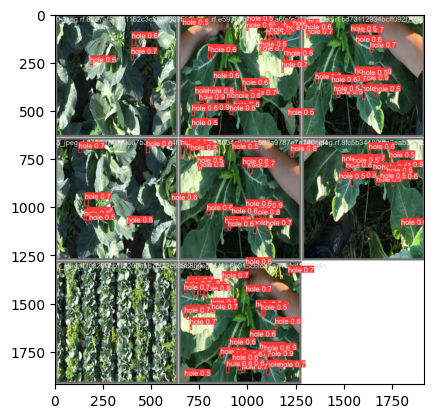

/content/runs/detect/val/val_batch1_pred.jpg


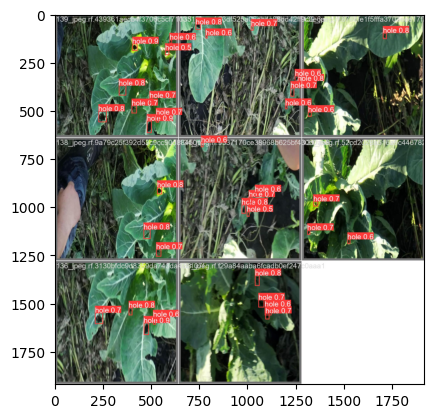

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
directory = '/content/runs/detect/val/' # путь к нужному каталогу здесь
# Проходимся по каталогу и выводим на экран все JPG файлы
for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        img_path = os.path.join(directory, filename)
        print(img_path)
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.show()


In [ ]:
# Cохранение весов
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/УИИ/Base/214/weights/best2.pt

In [ ]:
# best model
model = YOLO('/content/drive/MyDrive/УИИ/Base/214/weights/best2.pt')

In [ ]:
import os
import zipfile
import requests

data_dir = "/content/test_data"  # Путь к папке с новыми тестовыми данными
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

zip_url = "https://github.com/Untick/insects_detection/raw/main/_data/markup4OD/Cabbage_different_angle_yolov8_84_frames.zip"
zip_filename = os.path.join(data_dir, "Cabbage_different_angle_yolov8_84_frames.zip")

response = requests.get(zip_url)
with open(zip_filename, "wb") as zip_file:
    zip_file.write(response.content)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

In [ ]:
# Predict
model = YOLO('/content/drive/MyDrive/УИИ/Base/214/weights/best2.pt')
results = model.predict(source='/content/test_data/Data_84_frames/images/53_jpeg.rf.299d770e33a1064f185e4df65ef62b67.jpg', save=True)


image 1/1 /content/test_data/Data_84_frames/images/53_jpeg.rf.299d770e33a1064f185e4df65ef62b67.jpg: 800x800 13 holes, 22.0ms
Speed: 16.3ms preprocess, 22.0ms inference, 2.8ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2


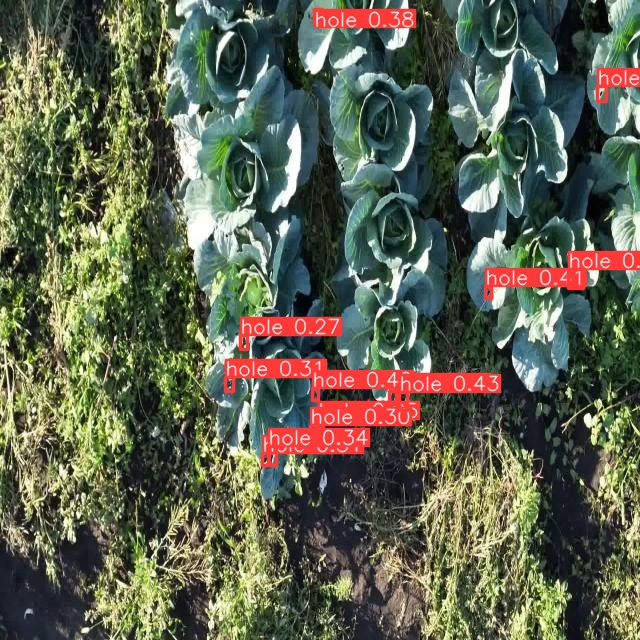

In [ ]:
Image(filename='/content/runs/detect/predict/53_jpeg.rf.299d770e33a1064f185e4df65ef62b67.jpg', height=600)